- 본 자료는 AWS Deepracer를 위한 로그분석 실습 자료입니다. 
- 이 자료의 저작권은 퍼블릭에이아이(https://publicai.co.kr/) 에 있습니다.
- 자료에 대한 무단 배포 및 복제를 금합니다.
---
- ** 이 표시 된 섹션은 각자 환경에 맞게 수정해야 합니다.

# ======== 1. 로그분석 준비 ========


## A. 실습환경


1. 이 실습은 Colab (즉, Python, Jupyter Notebook)에서 작성되었습니다.
  > Jupyter Notebook 은 웹브라우저 상에서 Python 코드를 단계적으로 실행해볼 수 있는 프로그램입니다. Colab 은 브라우저 기반으로 제공되는 무료 Jupyter Notebook 사용환경 입니다.
2. 이 실습에서는 로그 분석에 필요한 파일을 Google Drive 에 업로드하고 이것을 Colab에 마운트하여 진행합니다. 즉, Google Drive 를 Colab 에 연동하여 마치 로컬 PC 처럼 활용합니다.


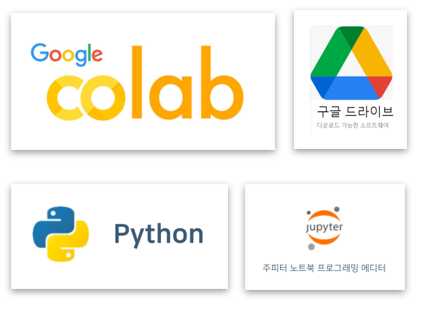

## B. 폴더생성 및 로그파일 준비 **



---
[준비작업 1] - 최초 1회만 준비
1. 우선, Google Drive 에 로그분석을 진행 할 폴더인 deepracer 를 생성합니다.

2. 위에서 생성한 deepracer 폴더 내에 tracks 폴더를 업로드 합니다. tracks 폴더 내에는 시뮬레이션 트랙의 waypoints 좌표가 npy 형식으로 저장되어 있습니다.  
(tracks 폴더는 https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks 에서 다운받을 수 있습니다.)

3. 위에서 생성한 deepracer 폴더 내에 log_analysis 폴더를 생성합니다.  

---
[준비작업 2] - 분석할 때 마다 작업

4. log_analysis 폴더 내에 로그 분석을 진행할 모델의 폴더를 생성합니다. 이 실습에서는 model01 라는 이름의 폴더를 생성하겠습니다.

5. AWS Deepracer 콘솔창에 들어가 models 메뉴에서 로그분석을 진행할 모델을 클릭합니다. 그리고 Training 우측에 있는 Download logs 버튼을 눌러 로그 데이터를 다운받습니다.

6. 5에서 다운받은 파일을 압축을 풉니다. 압축을 풀고 sim-trace 폴더 내의 training 폴더 내의 training-simtrace 폴더를 찾습니다. training-simtrace 폴더를 4에서 생성한 로그 분석을 진행할 모델의 폴더인 model01 폴더에 업로드 합니다.  
(training-simtrace 폴더 내에는 모델이 training 하는 동안 기록 된 로그 기록들이 iteration 별로 csv 파일 형태로 저장되어있습니다.)

- 작업 공간 구조 시각화

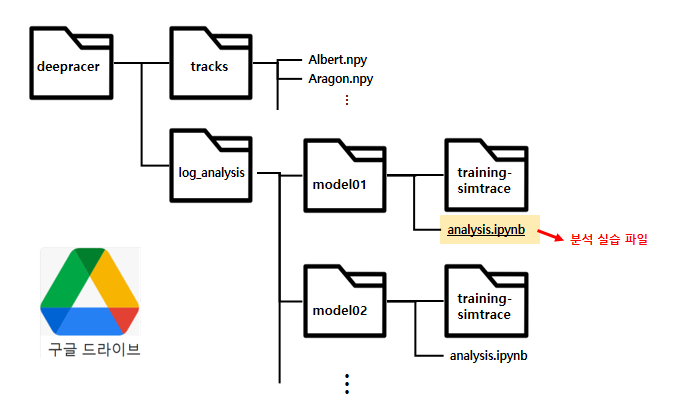

## C. 구글 드라이브 mount **


- Colab 좌측에 폴더모양을 누르면 Colab의 현재 작업 폴더를 확인할 수 있습니다.
- 아래와 같이 drive.mount('drive') 코드를 실행하면 Colab 작업 공간에 구글드라이브를 연동할 수 있습니다.
- 위와 같이 코드를 실행한 후 Colab 좌측에 폴더모양을 눌러보면 'drive/MyDrive' 폴더에 구글드라이브 최상위 디렉토리가 연동되었음을 볼 수 있습니다. 

In [27]:
# from google.colab import drive
# drive.mount('drive')

## D. 경로 입력 **

**[경로 입력]**  
- root_path = '위에서 생성한 deepracer 폴더 경로'

- folder_name = 'log_analysis 폴더 내에 생성한 로그분석 폴더명'

In [28]:
# deepracer 루트 경로 입력
root_path = '../deepracer'

# 로그분석 폴더명 입력
folder_name = 'model2'

In [29]:
import os

# 트랙 폴더
track_path = os.path.join(root_path, 'tracks')

# 로그 폴더
log_path = os.path.join(root_path, 'log_analysis', folder_name, 'training-simtrace')


print('트랙 폴더 : ', track_path)
print('로그 폴더 : ', log_path)

트랙 폴더 :  ../deepracer\tracks
로그 폴더 :  ../deepracer\log_analysis\model2\training-simtrace


## E. 라이브러리

- os : OS 제어
- math : 수식 계산
- pandas : 엑셀처럼 테이블 구조의 데이터 핸들링
- numpy : 수식 및 행렬 등의 고차원 수식 처리
- matplotlib : 시각화 기능

In [30]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## F. track 선택 **

- Track 폴더 내 목록 보기

In [31]:
track_list = os.listdir(track_path)
track_list.sort()
df_track_list = pd.DataFrame({'track_name' : track_list})
df_track_list

,track_name
0,AWS_track.npy
1,Albert.npy
2,AmericasGeneratedInclStart.npy
3,Aragon.npy
4,Austin.npy
5,Belille.npy
6,Bowtie_track.npy
7,Canada_Eval.npy
8,Canada_Training.npy
9,China_eval_track.npy


- 전체 Track 시각화

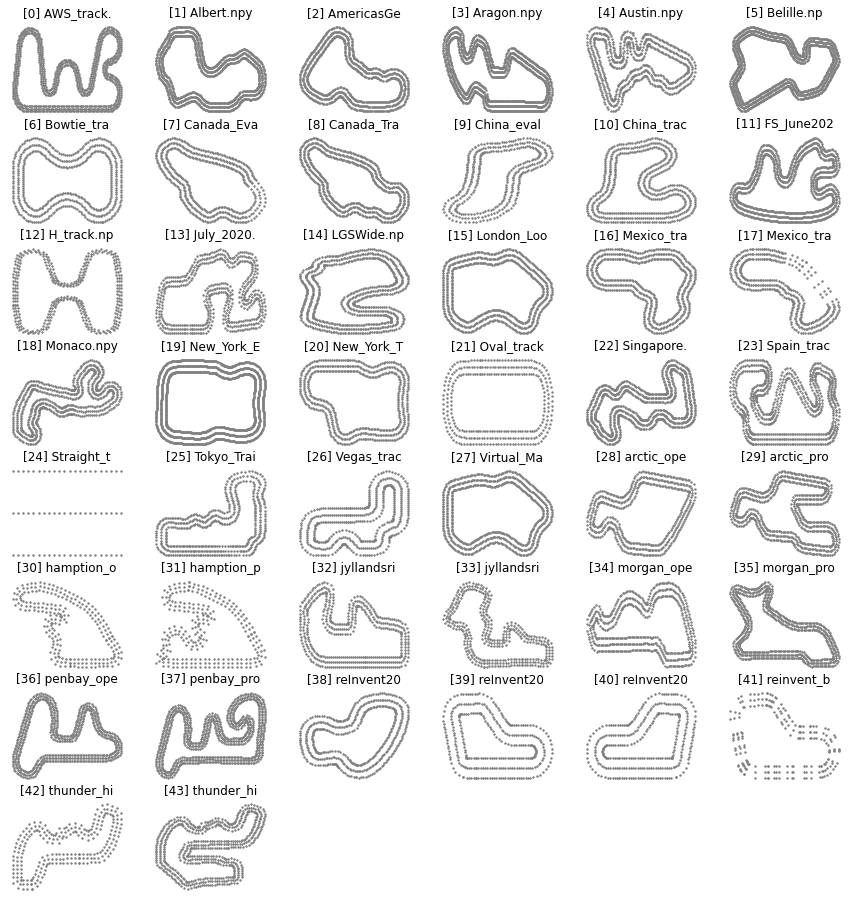

In [32]:
track_list = sorted(os.listdir(track_path))  # 트랙 리스트 정렬
c_len = 6    # 가로 개수
r_len = math.ceil(len(track_list) / c_len)  # 세로 개수

# 시각화
plt.figure(figsize = (15,2*r_len))
for i, track in enumerate(track_list) :
    plt.subplot(r_len, c_len, i+1)
    plt.title(f"[{i}] {track[:10]}")
    plt.axis('off')
    target_arr = np.load(os.path.join(track_path, track))
    target_C = target_arr[:,[0,1]]
    target_L = target_arr[:,[2,3]]
    target_R = target_arr[:,[4,5]]

    plt.scatter(target_C[:,0],target_C[:,1], c = 'gray', s = 2)
    plt.scatter(target_L[:,0],target_L[:,1], c = 'gray', s = 2)
    plt.scatter(target_R[:,0],target_R[:,1], c = 'gray', s = 2)
    
plt.show()

[트랙 선택]
- track_file_name = 'tracks 폴더 내에 있는 트랙 파일명'
> 이 실습에서는 The 2019 DeepRacer Championship Cup 트랙을 사용합니다.  
이 트랙의 파일명은 'reInvent2019_track.npy' 입니다.

In [33]:
# 트랙 파일명 입력
track_file_name = 'reInvent2019_track.npy'

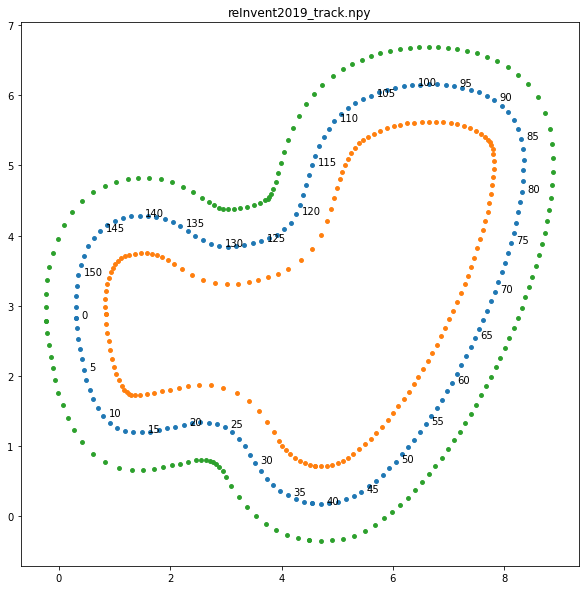

In [34]:
# 트랙 waypoint 가져오기
track_arr = np.load(os.path.join(track_path, track_file_name))
track_C = track_arr[:,[0,1]]  # 트랙 중심 좌표
track_L = track_arr[:,[2,3]]  # 트랙 좌측 좌표
track_R = track_arr[:,[4,5]]  # 트랙 우측 좌표

# 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], s = 15)
plt.scatter(track_L[:,0],track_L[:,1], s = 15)
plt.scatter(track_R[:,0],track_R[:,1], s = 15)

# index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(track_file_name)
plt.show()

# ======== 2. 로그 분석 ========

## A. 로그 파일 불러오기

- 경로 내 파일 목록 보기

In [35]:
# 폴더 내에 로그 파일 목록 가져오기
file_names = os.listdir(log_path)

# 데이터 프레임으로 변형
df_file_name = pd.DataFrame()
df_file_name['file_name'] = file_names

# 정렬
df_file_name['iter'] = pd.Series(file_names).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name = df_file_name.sort_values(by='iter').reset_index(drop = True)

print(df_file_name)

         file_name  iter
0  0-iteration.csv     0
1  1-iteration.csv     1
2  2-iteration.csv     2
3  3-iteration.csv     3
4  4-iteration.csv     4
5  5-iteration.csv     5
6  6-iteration.csv     6
7  7-iteration.csv     7
8  8-iteration.csv     8


- 로그 파일 불러오기

In [36]:
# 데이터 테이블로 정리하기
data_list = []
df_data = pd.DataFrame()
for i, file_name in enumerate(df_file_name['file_name']) :
    f = open(os.path.join(log_path, file_name), mode = 'r')
    text = f.read()
    f.close()

    # action 이 리스트형으로 되어 있는 경우 콤마(,)가 포함되어 있어서 제대로 읽어오지 못함. 이것을 전처리
    if '[' in text :
        text = text.replace('[','')
        text = text.replace(']','')
        text = text.replace('action', 'action_1,action_2')

    # dataframe 으로 변환
    text_lines = text.split('\n')
    text_list = [text_line.split(',') for text_line in text_lines]
    df = pd.DataFrame(text_list[1:], columns = text_list[0])
    df.dropna(inplace = True)

    # 자료형 변환
    float_col = df.columns[~ df.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
    int_col = ['episode', 'steps', 'closest_waypoint']
    bool_col = ['done',	'all_wheels_on_track']
    df[float_col] = df[float_col].astype('float')
    df[int_col] = df[int_col].astype('int')
    df[bool_col] = df[bool_col].astype('bool')

    # iteration 행 삽입
    new_col = df.columns.insert(0,'iteration')
    df['iteration'] = i
    df = df[new_col]

    # 마무리
    data_list.append(df)
    df_data = df_data.append(df)

# 인덱스 정리
df_data.reset_index(inplace = True, drop = True)

df_data

C:\Users\sumin\AppData\Local\Temp\ipykernel_4364\891118611.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(df)
C:\Users\sumin\AppData\Local\Temp\ipykernel_4364\891118611.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(df)
C:\Users\sumin\AppData\Local\Temp\ipykernel_4364\891118611.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(df)
C:\Users\sumin\AppData\Local\Temp\ipykernel_4364\891118611.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(df)
C:\Users\sumin\AppData\Local\Temp\ipykernel_4364\891118611.py:36: FutureWarning:

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action_2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,0.322510,2.691231,-84.006540,-20.000000,1.500000,-20.000000,1.500000,0.0,True,True,0.606200,1,23.118222,28.184,prepare,0.0
1,0,0,2,0.322497,2.691373,-84.006075,-20.000000,2.766765,-20.000000,2.766765,10.0,True,True,0.605583,1,23.118222,28.248,in_progress,0.0
2,0,0,3,0.323696,2.682976,-83.760699,-10.009394,2.719893,-10.009394,2.719893,10.0,True,True,0.642249,1,23.118222,28.312,in_progress,0.0
3,0,0,4,0.323281,2.662270,-84.447934,-6.819468,1.994488,-6.819468,1.994488,10.0,True,True,0.730723,1,23.118222,28.381,in_progress,0.0
4,0,0,5,0.323267,2.625477,-85.317349,9.656204,2.470413,9.656204,2.470413,10.0,True,True,0.888276,1,23.118222,28.449,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,8,179,152,1.234231,3.937181,177.931935,10.209000,2.922077,10.209000,2.922077,10.0,True,True,97.014036,142,23.118222,1223.230,in_progress,0.0
13211,8,179,153,1.103304,3.932605,179.880767,25.000000,2.522465,25.000000,2.522465,7.0,True,True,97.889187,143,23.118222,1223.294,in_progress,0.0
13212,8,179,154,0.960708,3.910796,-175.643215,15.602808,2.506264,15.602808,2.506264,10.0,True,True,98.655983,144,23.118222,1223.362,in_progress,0.0
13213,8,179,155,0.835727,3.879378,-171.126751,16.064755,1.500000,16.064755,1.500000,10.0,True,True,99.325240,145,23.118222,1223.437,in_progress,0.0


**[주요 변수 설명]**
- iteration : episode의 집합.
- episode : step 의 집합
- step : episode 의 순서
- X : 차량의 x좌표
- Y : 차량의 y좌표
- yaw : 차량의 정면 각도 ( = heading)
- steer : 차량 핸들 각도
- throttle : 차량 속도 ( = speed)
- action : 행동  
> 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
- reward : 현재 step 에서 받은 보상
- all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
- progress : 현재 Epiosde 에서 완주율
- closest_waypoint : 가장 가까운 waypoint
- tstamp : 훈련이 진행된 총 시간

## B. episode 분석

- 데이터 그룹화

In [37]:
# 에피소드 별로 데이터를 그룹화
df_groupby_episode = df_data.groupby('episode')

### B1. episode vs 완주율

**[episode 에 따른 완주율]**
- 에피소드가 진행됨에 따라 완주율이 높아지는 것이 좋습니다.
- s 자 형태로 완주율 최대치에 도달하는 것이 가장 이상적이라 볼 수 있습니다.

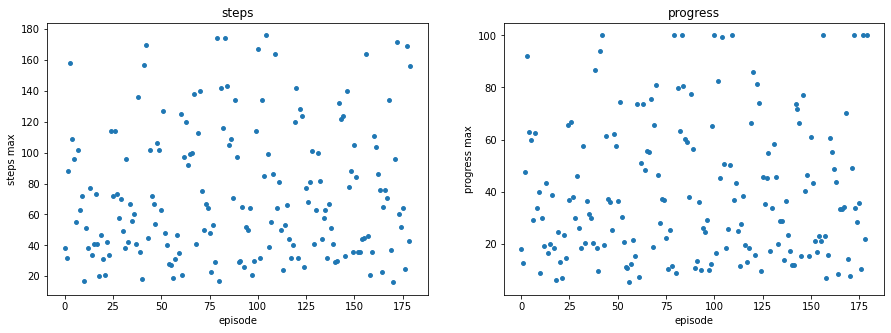

In [38]:
# 시각화
plt.figure(figsize = (15,5))

# step 계산
step_max = df_groupby_episode.max()['steps']

# step 시각화
plt.subplot(1,2,1)
plt.scatter(x = step_max.index, y = step_max, s = 15)
plt.title('steps')
plt.xlabel('episode')
plt.ylabel('steps max')

# progress 계산
progress_max = df_groupby_episode.max()['progress']

# progress 시각화
plt.subplot(1,2,2)
plt.scatter(x = progress_max.index, y = progress_max, s = 15)
plt.title('progress')
plt.xlabel('episode')
plt.ylabel('progress max')

plt.show()

### B2. episode vs reward

**[episode 에 따른 보상의 합]**
- 에피소드가 진행됨에 따라 보상의 합이 높아지는 것이 좋습니다.
- 완주율과 함께 S 자 형태로 수렴하는 것이 이상적이라 볼 수 있습니다.

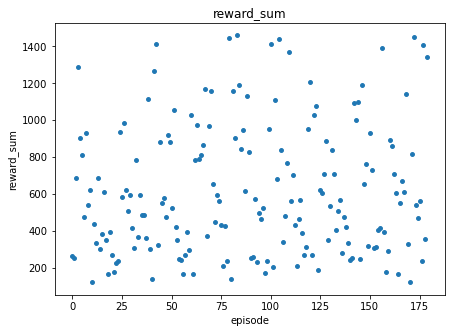

In [39]:
# reward_sum 계산
reward_sum = df_groupby_episode.sum()['reward']

# 시각화
plt.figure(figsize = (7,5))
plt.scatter(x = reward_sum.index, y = reward_sum, s = 15)
plt.title('reward_sum')
plt.xlabel('episode')
plt.ylabel('reward_sum')
plt.show()

## C. reward 기능 분석

### C1. 속도

**[속도에 따른 보상의 분포]**
- 속도가 높아질 수록 보상도 함께 증가하는 것이 이상적이라 볼 수 있습니다.
- 즉, / (슬래시) 형태의 증가하는 형태의 분포가 이상적입니다.

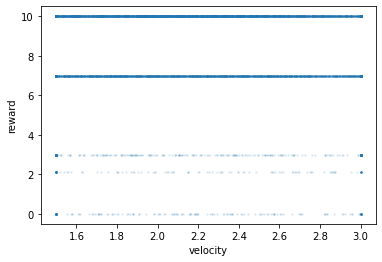

In [40]:
# 시각화
plt.scatter(x = df_data['throttle'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('velocity')
plt.ylabel('reward')
plt.show()

### C2. 조향

**[핸들 각도에 따른 보상의 분포]**
- 핸들 각도가 0에 가까울 수록 (즉, 정면을 바라볼 수록) 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉 ㅅ(시옷) 형태의 분포가 이상적입니다.

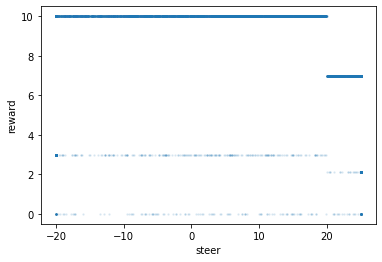

In [41]:
# 시각화
plt.scatter(x = df_data['steer'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('steer')
plt.ylabel('reward')
plt.show()

### C3. distance_from_center

**[중심으로부터 거리에 따른 보상의 분포]**
- 중심으로부터 거리가 0에 가까울 수록 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉, 감소하는 형태의 그래프가 이상적입니다.

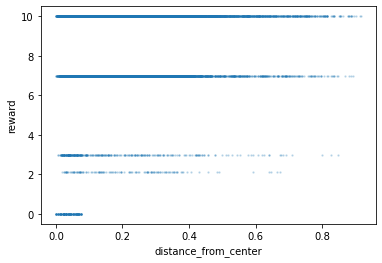

In [42]:
# waypoint 중심 좌표 가져오기
x_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,0])
y_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,1])

# 중심으로 부터의 거리 계산
distance_from_center = ((df_data['X'] - x_center)**2 + (df_data['Y'] - y_center)**2)**(1/2)

# 시각화
plt.scatter(distance_from_center, df_data['reward'], alpha = 0.2, s = 2)
plt.xlabel('distance_from_center')
plt.ylabel('reward')
plt.show()

## D. 분포 조사

### D1. 행동 분포

- 종 모양 또는 고르게 분포하는 경우가 이상적입니다.

Text(0.5, 1.0, 'throttle')

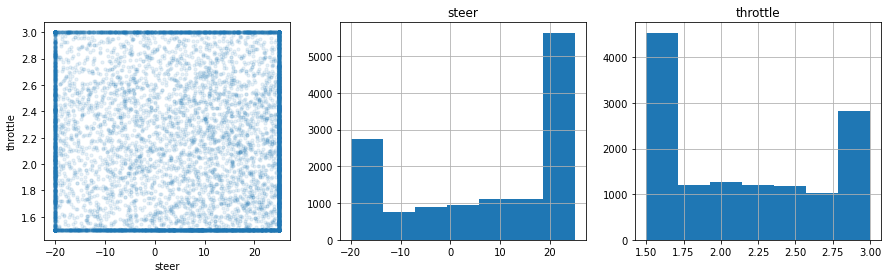

In [43]:
# 이미지 크기 지정
plt.figure(figsize = (15,4))

# 행동 분포 scatter
plt.subplot(1,3,1)
plt.scatter(x = df_data['steer'], y = df_data['throttle'], alpha = 0.1, s = 10)
plt.xlabel('steer')
plt.ylabel('throttle')

# 핸들 행동 histogram
plt.subplot(1,3,2)
df_data['steer'].hist(bins = 7)
plt.title('steer')

# 속도 행동 histogram
plt.subplot(1,3,3)
df_data['throttle'].hist(bins = 7)
plt.title('throttle')

### D2. reward 분포

- reward 분포는 종 모양을 띄는 것이 이상적입니다.

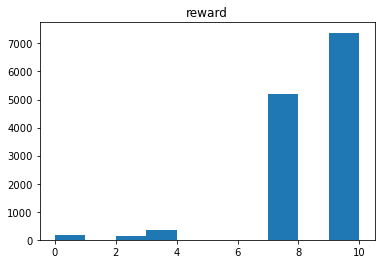

In [44]:
# 시각화
plt.hist(df_data['reward'], bins = 10)  # 10개 구간
plt.title('reward')
plt.show()

## E. 자취 시각화

### E1. 위치

**[자취 분포 시각화]**

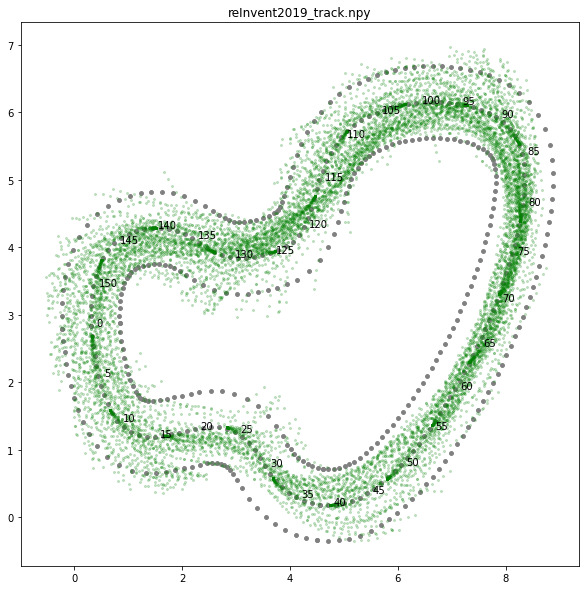

In [45]:
# 트랙 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 로그 자취 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = 'green', s = 4, alpha = 0.2)

# 출력
plt.title(track_file_name)
plt.show()

### E2. 속도

**[속도 분포 시각화]**

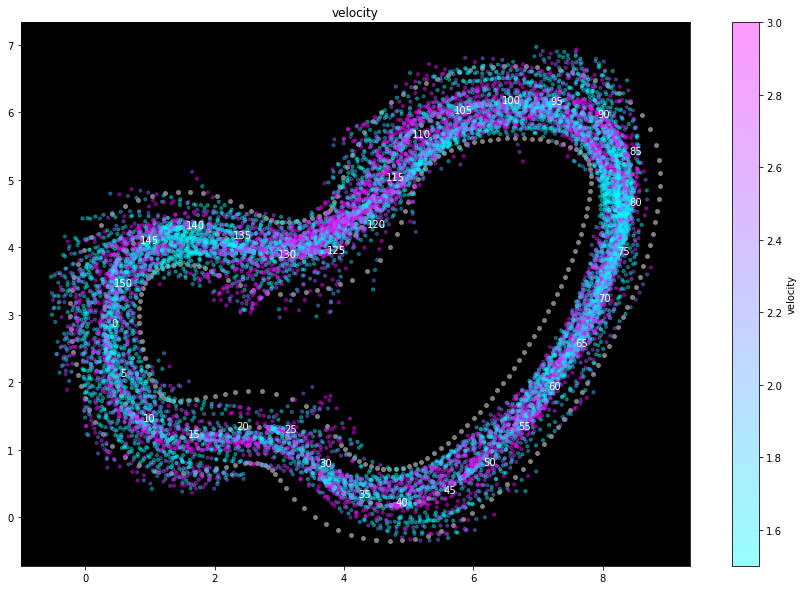

In [46]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

### E3. reward

**[reward 분포 시각화]**

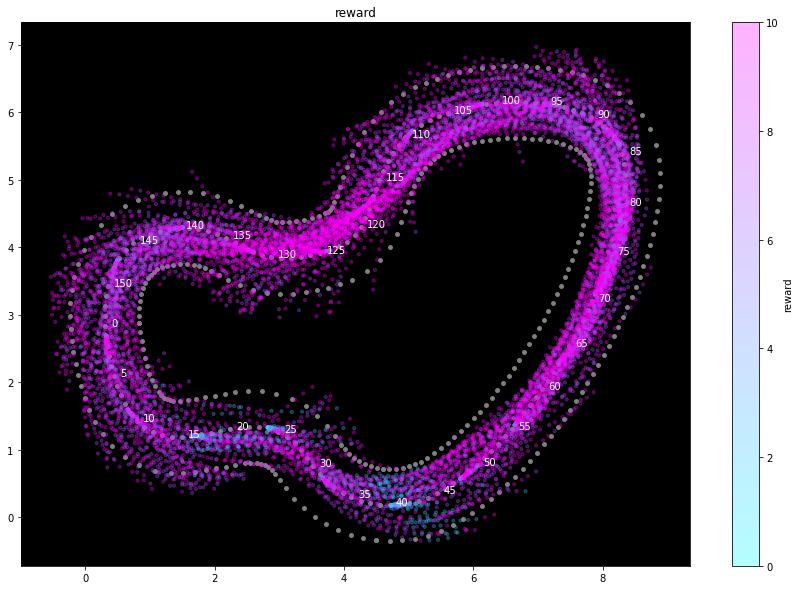

In [47]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 reward에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['reward'], s = 10, alpha = 0.3, cmap = plt.cm.cool)
plt.colorbar(label='reward')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('reward')
plt.gca().set_facecolor('black') # 배경색
plt.show()

### E4. 위험 구간

- 에피소드별 마지막 waypoint

In [48]:
df_last_waypoint = df_data[['episode', 'closest_waypoint']].copy()
df_last_waypoint = df_last_waypoint[::-1]
df_last_waypoint = df_last_waypoint.drop_duplicates(subset = 'episode')
df_last_waypoint = df_last_waypoint.rename({'closest_waypoint':'last_waypoint'}, axis = 1)
df_last_waypoint = df_last_waypoint.reset_index(drop = True)
df_last_waypoint

,episode,last_waypoint
0,179,146
1,178,18
2,177,131
3,176,139
4,175,16
...,...,...
175,4,128
176,3,11
177,2,89
178,1,27


- 마지막 waypoint 개수

In [49]:
df_dangerous = df_last_waypoint['last_waypoint'].value_counts()[::-1]
df_dangerous = df_dangerous.reset_index(name = 'count')
df_dangerous = df_dangerous.rename({'index':'waypoint'}, axis = 1)
df_dangerous

,waypoint,count
0,28,1
1,70,1
2,95,1
3,32,1
4,137,1
...,...,...
75,152,5
76,93,6
77,91,6
78,16,8


**[위험 구간 시각화]**

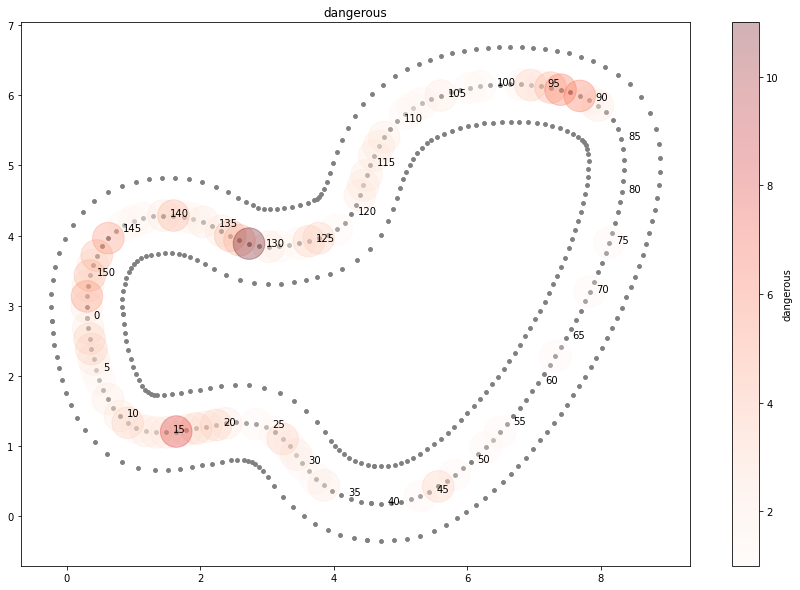

In [50]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 위험 (이탈) 구간 좌표 가져오기
x_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][0])
y_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][1])

# 위험 (이탈) 구간을 이탈한 정도에 따라 색깔을 다르게 시각화
plt.scatter(x = x_dan, y = y_dan,  c = df_dangerous['count'], s = 1000, alpha = 0.3, cmap = plt.cm.Reds)
plt.colorbar(label='dangerous')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title('dangerous')
plt.show()

#### E4-1. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

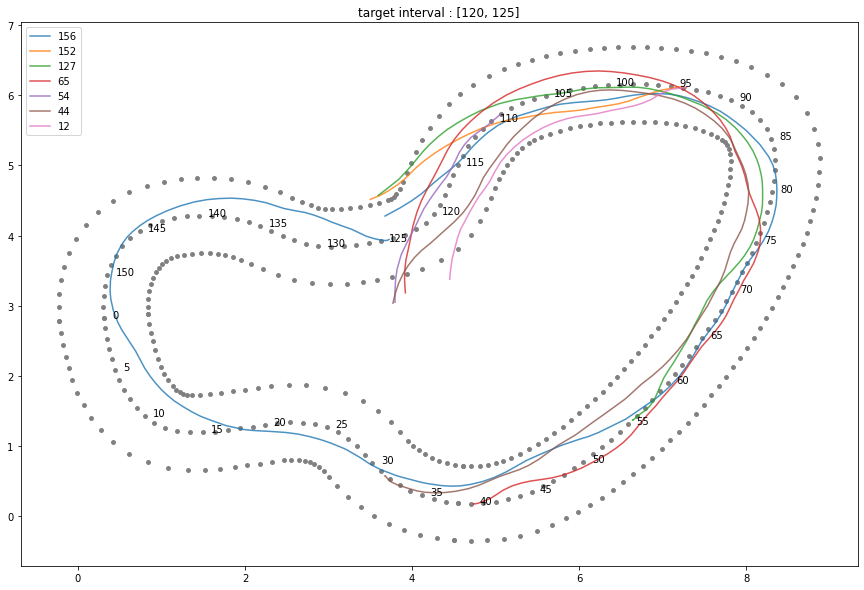

In [51]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [120, 125]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()

#### E4-2. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

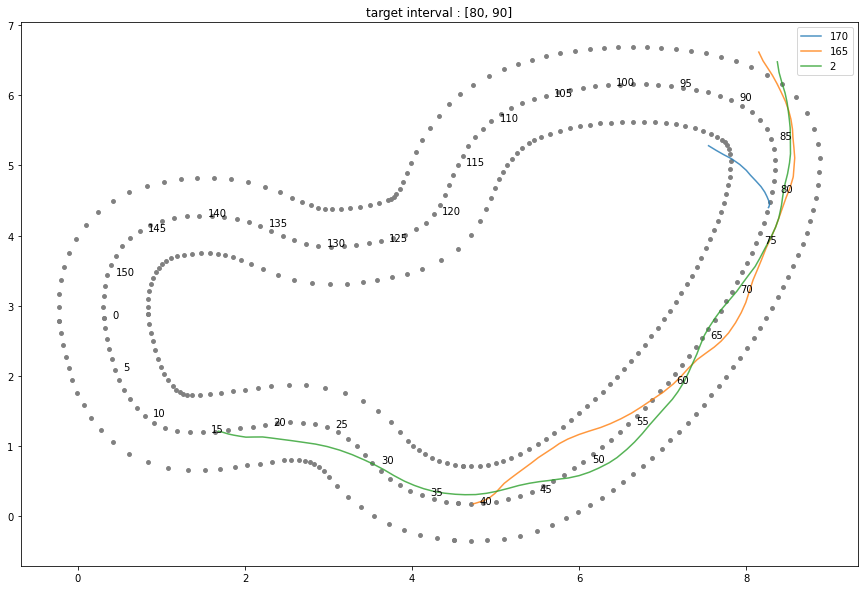

In [52]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [80, 90]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()